# Перцептрон

## Нейрон

### Устройство нейрона

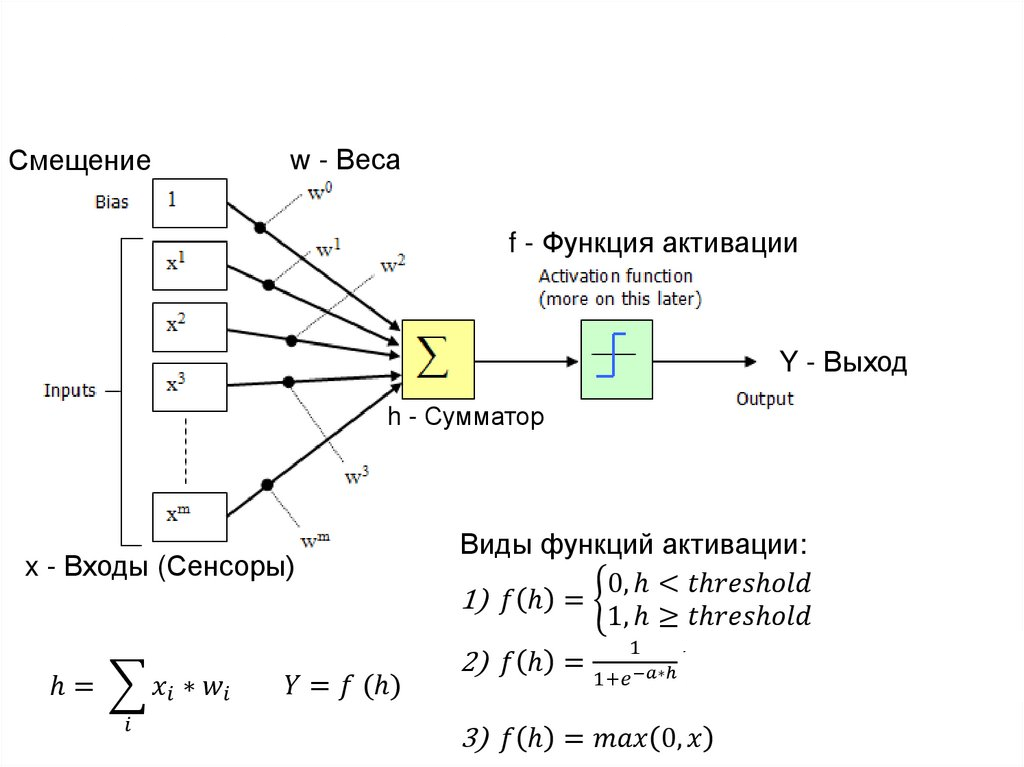

In [2]:
import torch
import torch.nn as nn

# базовые блоки торча по умолчанию выполняет все вычисления как по батчу,
# другими словами, входные тензоры должны иметь размерность вида [batch_size, *(all_your_dims)]
x = torch.FloatTensor([[2, 4]])

linear = nn.Linear(in_features=2, 
              out_features=1) # по сути матричное перемножение на веса 2 -> 1

# если ручками не обозначить, то будут произвольные значения браться
linear.weight.data = torch.FloatTensor([[1, 1]])
linear.bias.data   = torch.FloatTensor([[-1]])

sigmoid = nn.Sigmoid()

def net(x):
    return sigmoid(linear(x))

net(x)

tensor([[0.9933]], grad_fn=<SigmoidBackward0>)

Рисуем линию
$x_1 + x_2 - 1 = 0$

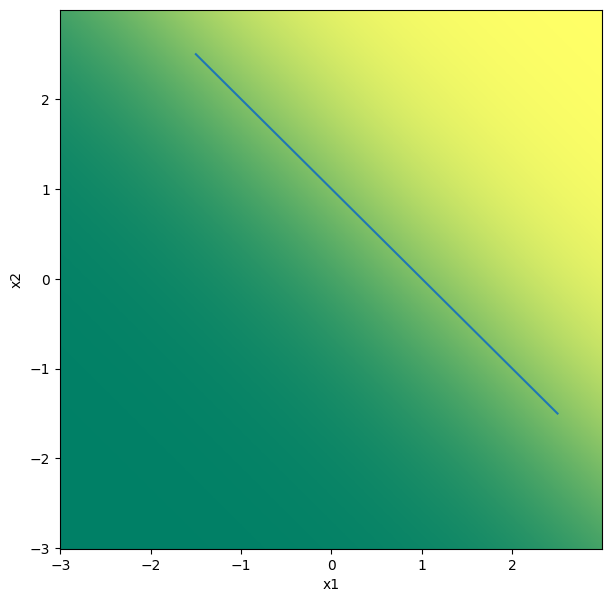

In [3]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.arange(-3, 3, .01), np.arange(-3, 3,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

predicted = net(torch.FloatTensor(input_field)).data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='summer')
plt.xlabel('x1')
plt.ylabel('x2')

x_1 = np.linspace(-1.5, 2.5, 100)
x_2 = 1 - x_1 

ax.plot(x_1, x_2)

Есть теорема, которая говорит что с помощью нейросети мы можем приблизить любую фукнцию, с любой точностю. Только как подбирать эти самые веса она не говорит))

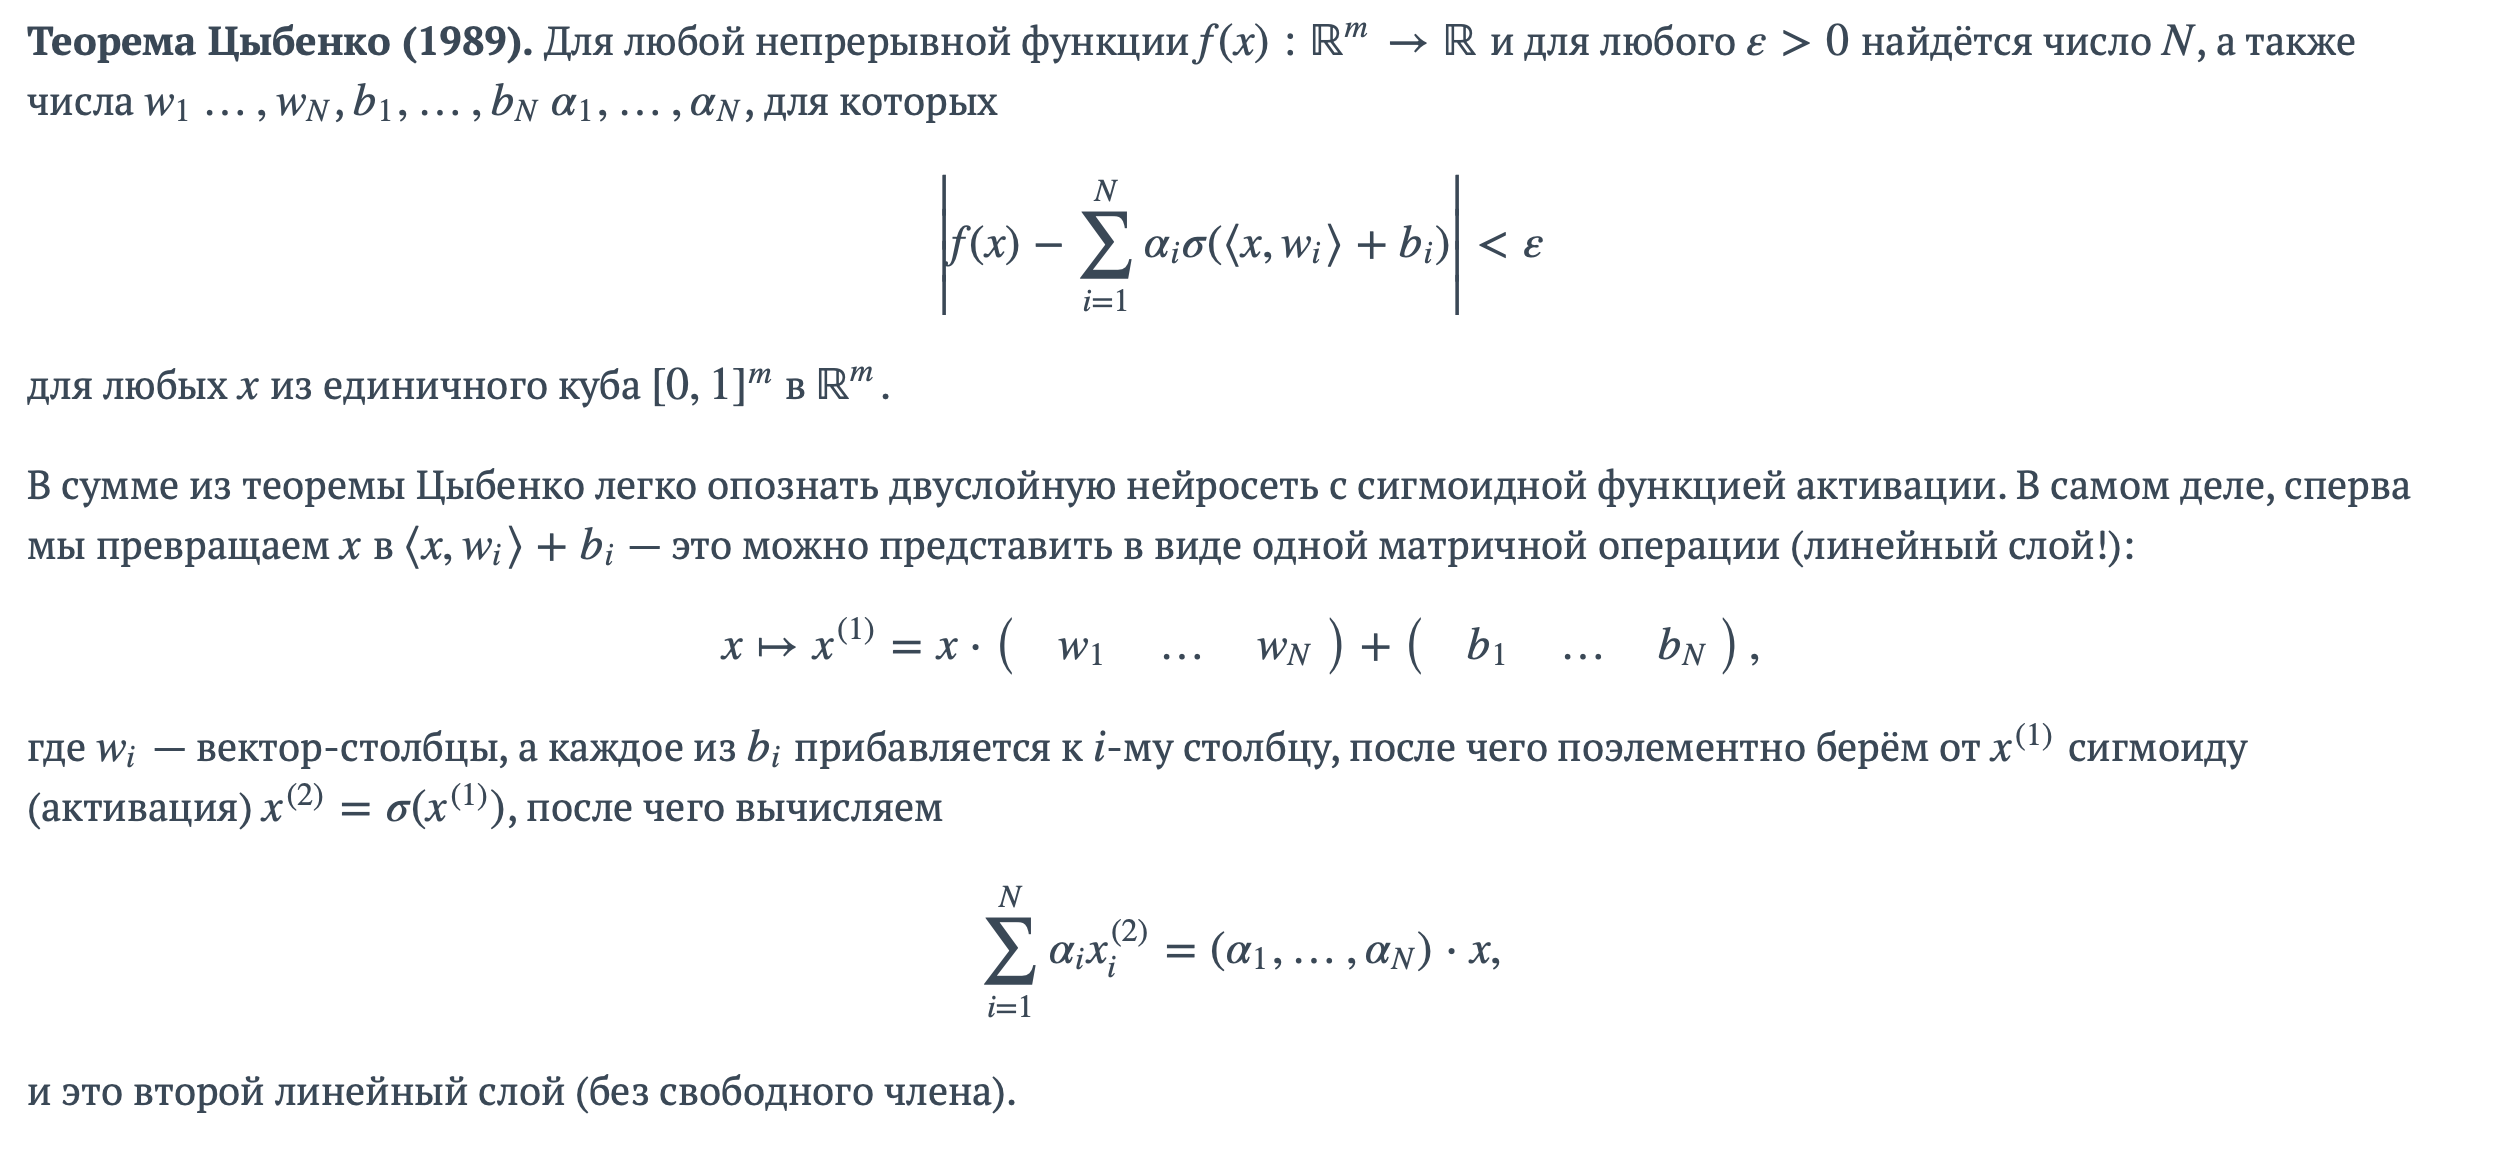

## Пример обучения одномерной нейронной сети
[Взято из туториала](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

Хотим с помощью нейронки обучить функцию $y = sin(x)$ 

в пространстве полиномов $y = a + bx + cx^2 + dx^3$

### Используем Autograd

99 189.95501708984375
199 130.08013916015625
299 90.05628967285156
399 63.28236389160156
499 45.360103607177734
599 33.35478210449219
699 25.30701446533203
799 19.908084869384766
899 16.283414840698242
999 13.84788703918457
1099 12.210034370422363
1199 11.10757827758789
1299 10.364912033081055
1399 9.86408519744873
1499 9.526062965393066
1599 9.297687530517578
1699 9.143241882324219
1799 9.038673400878906
1899 8.967803955078125
1999 8.919727325439453
Result: y = 0.007099194917827845 + 0.8493646383285522 x + -0.0012247294653207064 x^2 + -0.09228119254112244 x^3


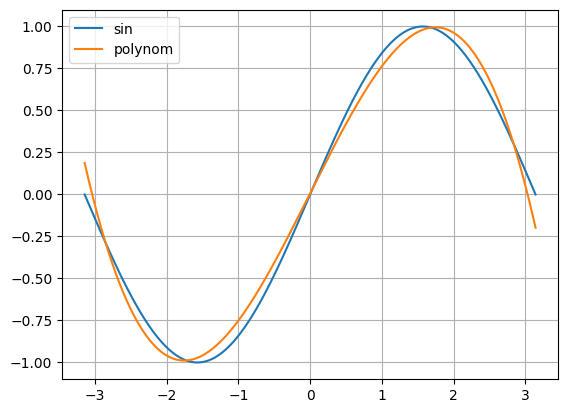

In [4]:
import math
dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    loss = (y_pred - y).pow(2).sum()
    
    if t % 100 == 99:
        print(t, loss.item())

    loss.backward()

    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

def f(x):
    return a.detach().numpy() + b.detach().numpy() * x + c.detach().numpy() * x ** 2 + d.detach().numpy() * x ** 3

xx = x.numpy()

plt.plot(xx, np.sin(x), label='sin')
plt.plot(xx, f(xx), label='polynom')
plt.legend()
plt.grid()

##  Используем нейросеть + встроенный лосс

In [5]:
# Подготовили данные 
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

In [6]:
xx

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])

In [7]:
# Define model
model = nn.Sequential(
    nn.Linear(3, 1),
    nn.Flatten(0, 1)
)

for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.4794, -0.2537,  0.3019]], requires_grad=True)
Parameter containing:
tensor([0.2170], requires_grad=True)


99 1352.6116943359375
199 899.2818603515625
299 598.9677734375
399 399.9961242675781
499 268.1507263183594
599 180.7731170654297
699 122.8567123413086
799 84.4619140625
899 59.00443649291992
999 42.121726989746094
1099 30.923484802246094
1199 23.494220733642578
1299 18.564268112182617
1399 15.292072296142578
1499 13.119709968566895
1599 11.67707633972168
1699 10.718801498413086
1799 10.082056999206543
1899 9.658843040466309
1999 9.377455711364746
Result: y = 0.007976135239005089 + 0.8349282741546631 x + -0.0013760160654783249 x^2 + -0.09022773802280426 x^3


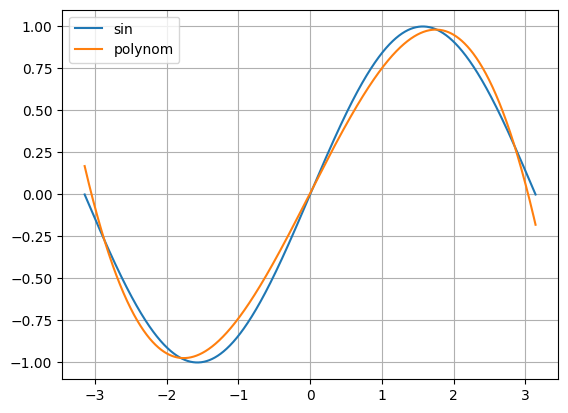

In [8]:
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6

for it in range(2000):
    # Forward pass: все до последней ноды
    y_pred = model(xx) 

    # Compute loss: финальная нода с лоссом
    loss = loss_fn(y_pred, y)
    if it % 100 == 99:
        print(it, loss.item())

    # Обнулили градиенты с прошлой итерации
    model.zero_grad()    
        
    # Backward pass: просчитали градиенты назад
    loss.backward()

    # Update the weights using gradient descent. 
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

            

# просто рисовалка      
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')
def f(x):
    return linear_layer.bias.item() + linear_layer.weight[:, 0].item() * x + \
           linear_layer.weight[:, 1].item() * x ** 2 + linear_layer.weight[:, 2].item() * x ** 3

x = x.detach()
plt.plot(x, np.sin(x), label='sin')
plt.plot(x, f(x), label='polynom')
plt.legend()
plt.grid()

## Используем готовые оптимайзеры

99 774.1884765625
599 136.72518920898438
1099 124.02263641357422
1599 90.41129302978516


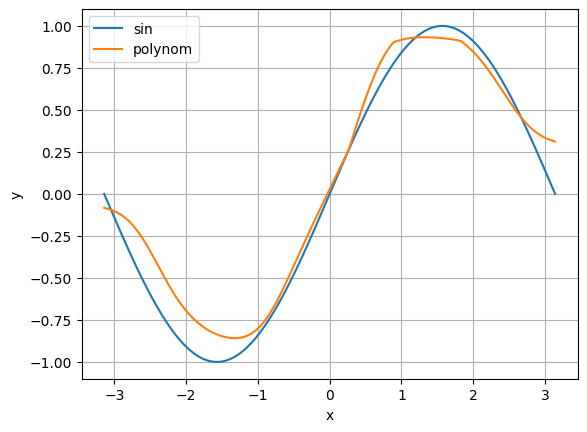

In [6]:
# Подготовили данные 
import torch
import math
import torch.nn as nn
import matplotlib.pyplot as plt

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Сделали шаблон сети
model = nn.Sequential(
    nn.Linear(3, 4),
    nn.Sigmoid(),
    nn.Linear(4, 5),
    nn.Sigmoid(),
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Flatten(0, 1)
)

# Обозначили лосс
loss_fn = torch.nn.MSELoss(reduction='sum')

# Выбрали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
torch.optim.Adam()
#optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

# Спуск
for t in range(2000):
    # Нашли результат на текущей сети
    y_pred = model(xx)

    # Посчитали ошибку
    loss = loss_fn(y_pred, y)
    if t % 500 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()

import numpy as np
@torch.no_grad()
def f(x):
    xx = x.unsqueeze(-1).pow(p)
    return model(xx).reshape(-1).numpy()

plt.plot(x, np.sin(x), label='sin')
plt.plot(x, f(x), label='polynom')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()

![title](https://cs231n.github.io/assets/nn3/opt1.gif)

## Функции активации

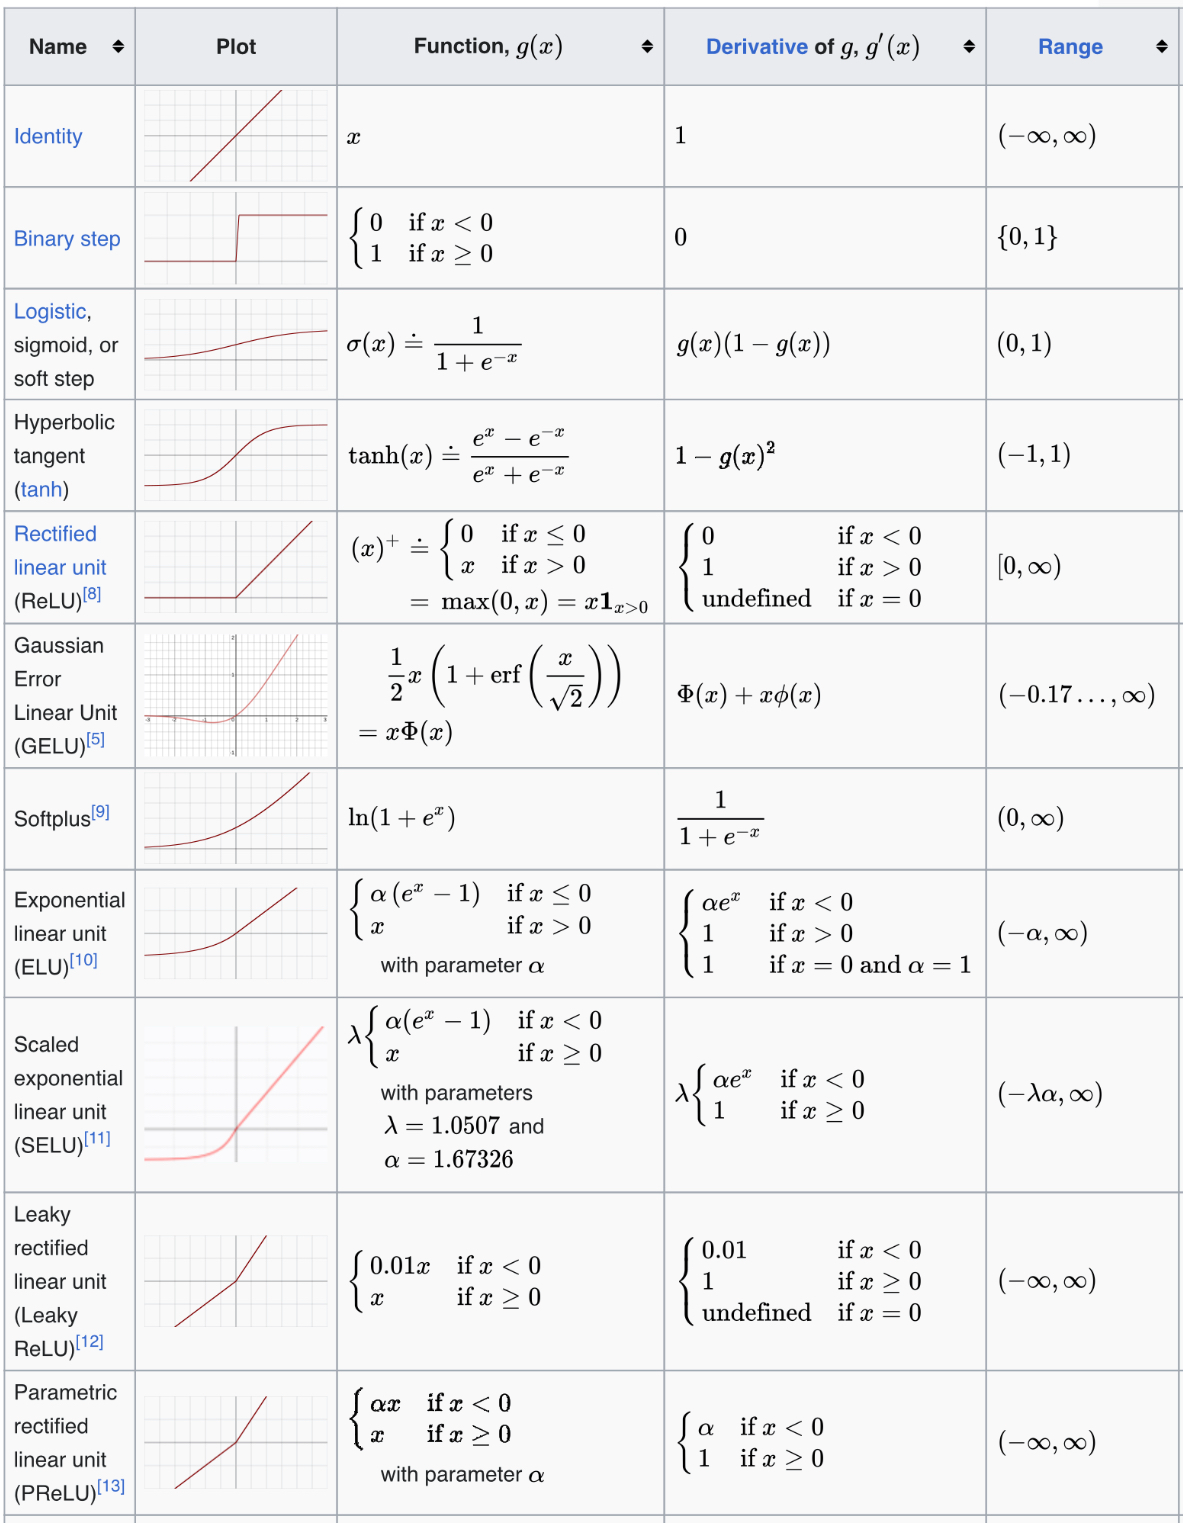

# Так и еще раз на закрепление:
* FORWARD (посчитали вперед по существующей сети)
* LOSS (посчитали ошибку)
* ZERO_GRAD (обнулили градиенты)
* BACKWARD (посчитали производные)
* UPDATE Weights (обновили веса)


## Кастомные торчовые модули

Зачастую используемая архитектура нетривиальная, базовые блоки торча по типу `nn.Linear`, `nn.ReLU`, 
а также их композиции, такие как `nn.Sequential` не позволяют описать прямой прогон сети.
Для того, чтобы описать логику инференса в торче есть интерфейс, позволяющий писать кастомные модули

In [9]:
# exact copy from
# https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [10]:
model = NeuralNetwork()

x = torch.rand(1, 28, 28)
logits = model(x)